# Missing Values - Feature Engineering

Life Cycle of Data Science Projects
1. Data Collection Strategy --- from company site, 3rd Party API's, Surveys
2. Feature Engineering - Handling missing values


Why are their Missing values ? Survey ---- Depression Survey
1. They hesitate to put down the information
2. Survey informations are not valid
3. Men --- Salary
4. Women --- Age
5. People may have died -- Nan

Data Science Projects --- Data Should be collected from multiple sources

### What are different types of missing values ? 

1. ##### Missing Completely data at random(MCAR):
A variable is missing completely at random(MACR) if the probability of being missing is the same for all the observations. When the data is MCAR, there is no absolute relationship between the data missing and other values, observed or missing, with the dataset. In other words those missing data points are random subset of data. There is no systematic going on that makes some data more likely to be missing than other.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
# Embarked is the column missing data at random

2. ##### Missing data not radom --- Systematic missing values:
There is absolute some relationship between the data missing and any other values, observed or missing, within the dataset

In [8]:
# Age and Cabin columns in the titanic dataset are missing data not at random

In [9]:
import numpy as np

In [10]:
df['Cabin_null'] = np.where(df['Cabin'].isnull(), 1, 0)

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [12]:
df[['Cabin', 'Cabin_null']]

,Cabin,Cabin_null
0,NaN,1
1,C85,0
2,NaN,1
3,C123,0
4,NaN,1
...,...,...
886,NaN,1
887,B42,0
888,NaN,1
889,C148,0


In [13]:
### Find the percenatge of null values in the titanic

df['Cabin_null'].mean()

0.7710437710437711

In [14]:
df['Age_null'] = np.where(df['Age'].isnull(), 1, 0)

In [15]:
df['Age_null'].mean()

0.19865319865319866

In [16]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

3. ##### Missing at Random(MAR):


Men --- Hide their salary
Women --- Hide their age

###### Visualize the missing values

In [17]:
import missingno as msno

<AxesSubplot:>

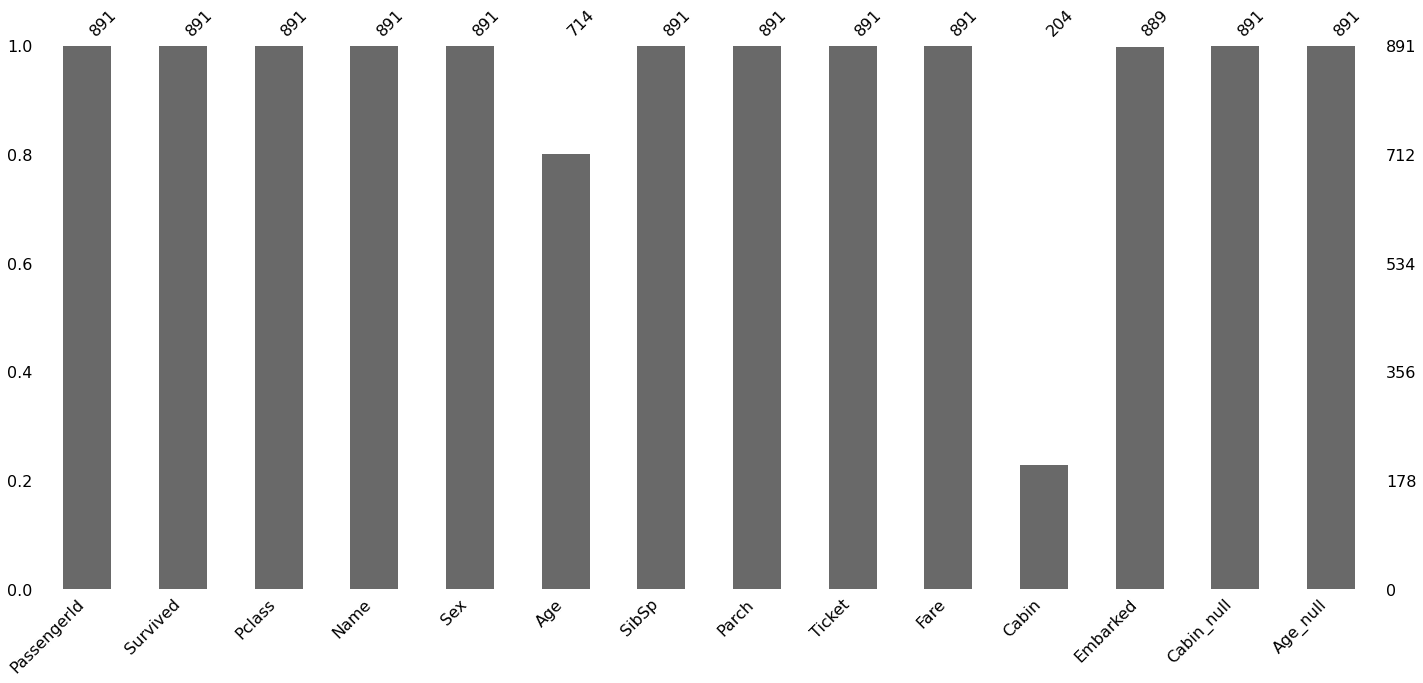

In [18]:
msno.bar(df)

<AxesSubplot:>

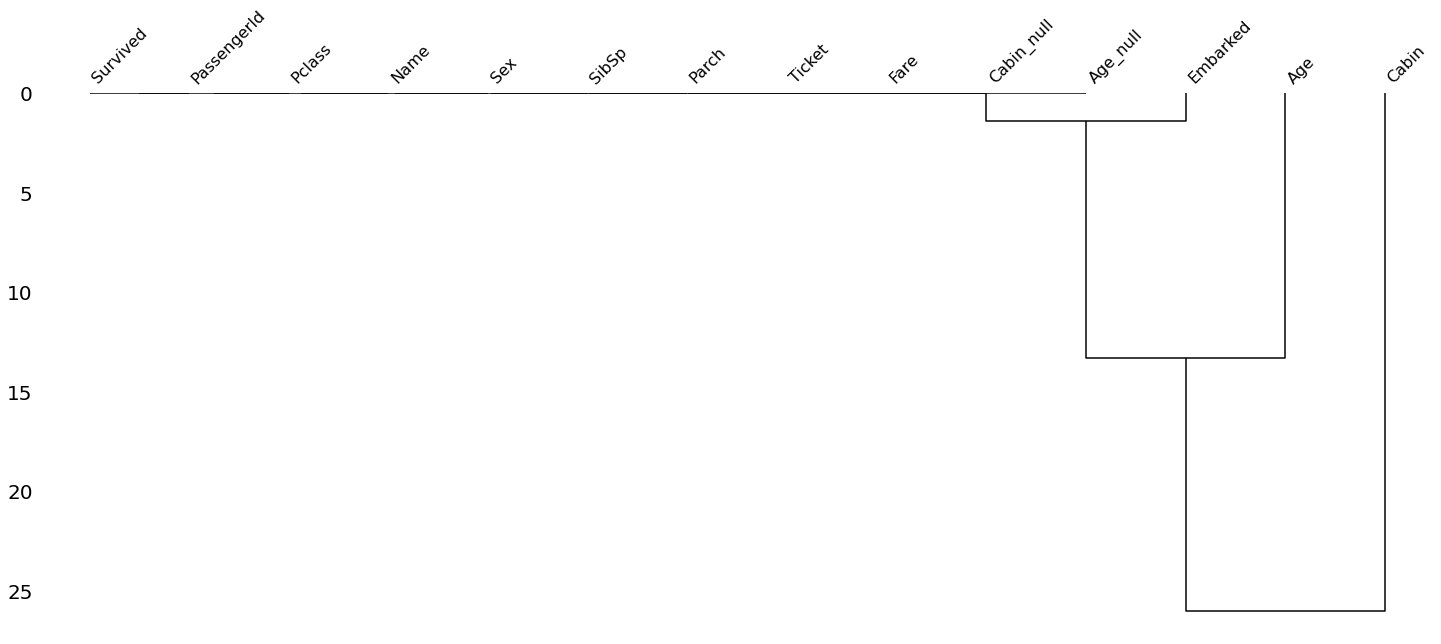

In [19]:
msno.dendrogram(df)

<AxesSubplot:>

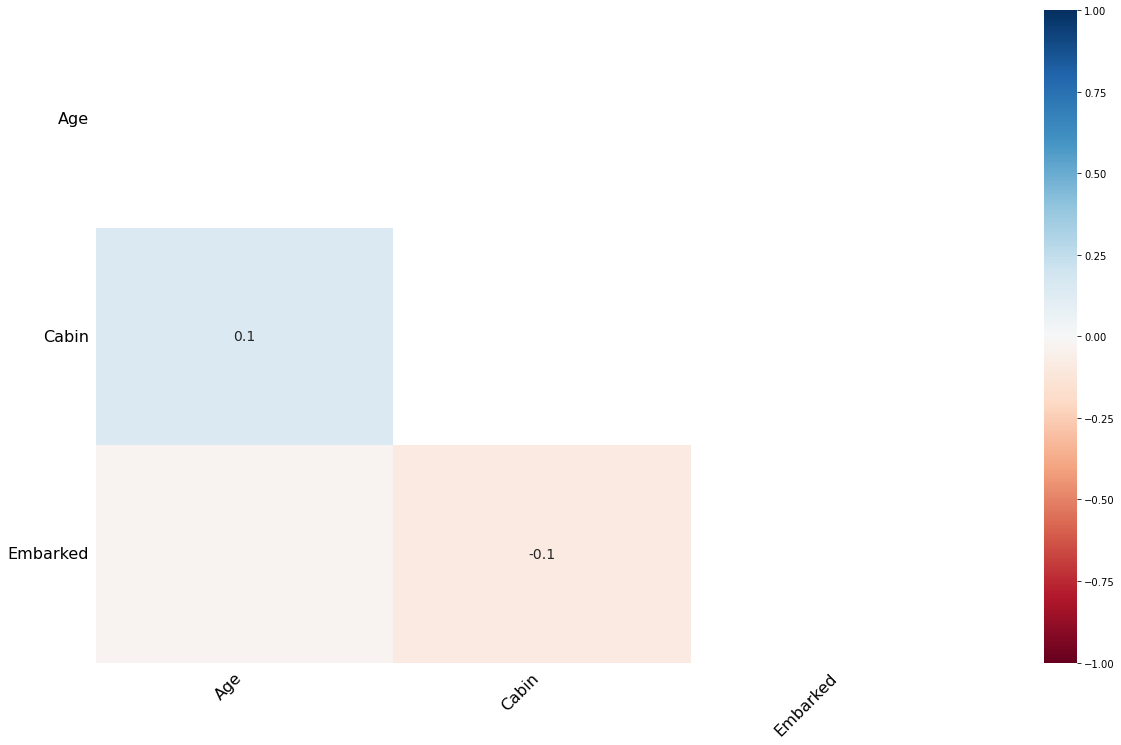

In [20]:
msno.heatmap(df)

### All techniques of handling missing values

1. Mean, Median, Mode replacement

2. Random Sample Imputation

3. Capturing Nan values with new feature

4. End of distribution

5. Arbitrary imputation

6. Frequent Category imputation

# Mean/Median/Mode imputation

When should we apply ?

Mean/Median Imputation when the data is completely missing at random(MCAR). We solve this by replacing the NAN with the most frequent occurence of variable

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', usecols=['Age', 'Survived', 'Fare'])

In [22]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [23]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [24]:
def imputate_variable(dataframe, variable, value):
    if value == 'mean':
        method = dataframe[variable].mean()
        dataframe[variable+'mean'] = df[variable].fillna(value = method)
    elif value == 'median':
        method = dataframe[variable].median()
        dataframe[variable+'median'] = df[variable].fillna(value = method)
    else:
        print('Enter a proper measure to handle the missing values')

In [25]:
imputate_variable(df, 'Age', 'median')

In [26]:
df

,Survived,Age,Fare,Agemedian
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [30]:
print('Age : ', df['Age'].std())
print('Age Median : ', df['Agemedian'].std())

Age :  14.526497332334044
Age Median :  13.019696550973194


In [32]:
import matplotlib.pyplot as plt

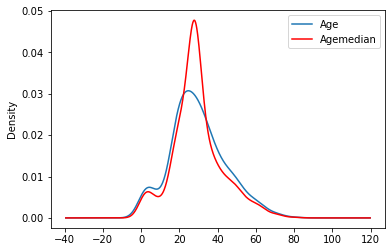

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax = ax)
df['Agemedian'].plot(kind = 'kde', ax=ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

# Advantages and Disadvantages

### Advantages

1. Easy to implement(Robust to Outliers)
2. Faster way to obtain the dataset

### Disadvatages

1. Change or Distortion in original variance
2. Impacts the correlation